# Data Glacier
## OKEOMA IHUNWO
### LISUM26 Virtual Internship

## Task:

* Take any csv/text file of 2+ GB of your choice. --- (You can do this assignment on Google colab)

* Read the file ( Present approach of reading the file )

* Try different methods of file reading eg: Dask, Modin, Ray, pandas and present your findings in term of computational     efficiency

* Perform basic validation on data columns : eg: remove special character , white spaces from the col name

* As you already know the schema hence create a YAML file and write the column name in YAML file. --define separator of   
  read and write file, column name in YAML

* Validate number of columns and column name of ingested file with YAML.

* Write the file in pipe separated text file (|) in gz format.

* Create a summary of the file:

    Total number of rows,

### Mounting the Google drive and loading the dataset using Pandas to gain access to the dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


### Creating 2Gig Dataset to be used for the project

In [2]:
%cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [4]:
import os
import pandas as pd

def split_csv(input_file, output_folder, max_size_mb):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Calculate the maximum size in bytes
    max_size_bytes = max_size_mb * 1024 * 1024

    # Read the CSV file
    df = pd.read_csv(input_file)

    # Get the total number of rows and columns
    total_rows, total_cols = df.shape

    # Calculate the number of rows per chunk based on the maximum size
    rows_per_chunk = int(max_size_bytes / (df.memory_usage(index=True).sum() / total_rows))

    # Split the DataFrame into chunks
    chunks = [df.iloc[i:i + rows_per_chunk] for i in range(0, total_rows, rows_per_chunk)]

    # Save each chunk as a separate CSV file
    for i, chunk in enumerate(chunks):
        output_file = os.path.join(output_folder, f'output_{i + 1}.csv')
        chunk.to_csv(output_file, index=False)
        print(f'Saved {output_file}')

if __name__ == "__main__":
    input_file = 'Data_Glacier_Internship/2019-Oct.csv'
    output_folder = 'Data_Glacier_Internship/data'
    max_size_mb = 2000  # 2 GB

    split_csv(input_file, output_folder, max_size_mb)


Saved Data_Glacier_Internship/data/output_1.csv
Saved Data_Glacier_Internship/data/output_2.csv


### Fetching the Size of the Dataset

In [5]:
#Calculating the size of the data file
import os
import time
os.path.getsize('Data_Glacier_Internship/data/output_2.csv')

1778670561

From the above result, the dataset is above 1.7 Gig.

### Reading dataset using Pandas library

In [ ]:
results = []

In [ ]:
import pandas as pd
start_time = time.time()
pandas_df = pd.read_csv('Data_Glacier_Internship/data/output_2.csv')
end_time = time.time()
pandas_time = end_time-start_time

results.append({"lib":"pandas","time":float("{}".format(pandas_time))})
print("Time taken to Read the csv file using pandas library: ",(pandas_time),"seconds")

Time taken to Read the csv file using pandas library:  60.738362312316895 seconds


In [ ]:
pandas_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 19:10:38 UTC,view,41900000,2090971686529663114,appliances.environment.vacuum,NaN,36.22,519623371,30b199bc-649a-436d-871d-7dbbd3531eda
1,2019-10-21 19:10:38 UTC,view,28715969,2053013565069067197,apparel.shoes.keds,adidas,97.81,512622744,4a565395-7122-4101-ab48-f1ceb74baee3
2,2019-10-21 19:10:38 UTC,view,26200067,2053013563693335403,NaN,NaN,180.70,562735644,876ef257-d2fd-4a44-bf97-e31d4ebf27dd
3,2019-10-21 19:10:38 UTC,view,1201297,2172371436436455782,electronics.tablet,apple,411.57,542347312,772eb069-a025-42b1-8e07-ad675976beda
4,2019-10-21 19:10:38 UTC,view,44500045,2144356630513320518,NaN,omabelle,2471.11,514114558,af003736-e82c-4810-bb78-cecd8e761126


### Reading dataset using Dask library

In [ ]:
from dask import dataframe as dd
start_time = time.time()
dask_df = dd.read_csv('Data_Glacier_Internship/data/output_2.csv')
end_time = time.time()
dask_time = end_time-start_time

results.append({"lib":"dask","time":float("{}".format(dask_time))})
print("Time taken to Read the csv file using dask library: ",(dask_time),"seconds")

Time taken to Read the csv file using dask library:  0.24440598487854004 seconds


In [ ]:
dask_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 19:10:38 UTC,view,41900000,2090971686529663114,appliances.environment.vacuum,NaN,36.22,519623371,30b199bc-649a-436d-871d-7dbbd3531eda
1,2019-10-21 19:10:38 UTC,view,28715969,2053013565069067197,apparel.shoes.keds,adidas,97.81,512622744,4a565395-7122-4101-ab48-f1ceb74baee3
2,2019-10-21 19:10:38 UTC,view,26200067,2053013563693335403,NaN,NaN,180.70,562735644,876ef257-d2fd-4a44-bf97-e31d4ebf27dd
3,2019-10-21 19:10:38 UTC,view,1201297,2172371436436455782,electronics.tablet,apple,411.57,542347312,772eb069-a025-42b1-8e07-ad675976beda
4,2019-10-21 19:10:38 UTC,view,44500045,2144356630513320518,NaN,omabelle,2471.11,514114558,af003736-e82c-4810-bb78-cecd8e761126


### Reading Dataset using Modin Dask

In [ ]:
!pip install modin[dask]

In [ ]:
!pip install fastapi

In [ ]:
!pip install kaleido

In [ ]:
!pip install python-multipart

In [ ]:
!pip install uvicorn

In [ ]:
os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask

from distributed import Client
client = Client(memory_limit='4GB')
import modin.pandas as modindask_pd
start_time = time.time()
%time  mdask_df = modindask_pd.read_csv('Data_Glacier_Internship/data/output_2.csv')

end_time = time.time()
mdask_time = end_time-start_time

results.append({"lib":"modindask","time":float("{}".format(mdask_time))})
print("Time taken to Read the csv file using modindask library: ",(mdask_time),"seconds")


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-5x5ra2h8', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-ikhhqibe', purging
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:39667
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43235'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42435'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:45969', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:45969
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:44464
IN

CPU times: user 15.6 s, sys: 4.51 s, total: 20.1 s
Wall time: 2min 53s
Time taken to Read the csv file using modindask library:  173.29161882400513 seconds


In [ ]:
mdask_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 19:10:38 UTC,view,41900000,2090971686529663114,appliances.environment.vacuum,NaN,36.22,519623371,30b199bc-649a-436d-871d-7dbbd3531eda
1,2019-10-21 19:10:38 UTC,view,28715969,2053013565069067197,apparel.shoes.keds,adidas,97.81,512622744,4a565395-7122-4101-ab48-f1ceb74baee3
2,2019-10-21 19:10:38 UTC,view,26200067,2053013563693335403,NaN,NaN,180.70,562735644,876ef257-d2fd-4a44-bf97-e31d4ebf27dd
3,2019-10-21 19:10:38 UTC,view,1201297,2172371436436455782,electronics.tablet,apple,411.57,542347312,772eb069-a025-42b1-8e07-ad675976beda
4,2019-10-21 19:10:38 UTC,view,44500045,2144356630513320518,NaN,omabelle,2471.11,514114558,af003736-e82c-4810-bb78-cecd8e761126


### Reading Dataset using Modin Ray

In [ ]:
!pip install modin[ray]

In [ ]:
import modin.pandas as mpd
import ray
ray.shutdown()
ray.init()
start_time = time.time()
mray_df = mpd.read_csv('Data_Glacier_Internship/data/output_2.csv')

end_time = time.time()
mray_time = end_time - start_time

results.append({"lib":"modinray","time":float("{}".format(mray_time))})
print("Time taken to Read the csv file using modinray library: ",(mray_time),"seconds")

2023-11-25 04:08:03,472	INFO worker.py:1664 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
INFO:distributed.core:Event loop was unresponsive in Nanny for 10.42s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 10.42s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 10.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.12s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.7

Time taken to Read the csv file using modinray library:  134.54918932914734 seconds


In [ ]:
mray_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 19:10:38 UTC,view,41900000,2090971686529663114,appliances.environment.vacuum,NaN,36.22,519623371,30b199bc-649a-436d-871d-7dbbd3531eda
1,2019-10-21 19:10:38 UTC,view,28715969,2053013565069067197,apparel.shoes.keds,adidas,97.81,512622744,4a565395-7122-4101-ab48-f1ceb74baee3
2,2019-10-21 19:10:38 UTC,view,26200067,2053013563693335403,NaN,NaN,180.70,562735644,876ef257-d2fd-4a44-bf97-e31d4ebf27dd
3,2019-10-21 19:10:38 UTC,view,1201297,2172371436436455782,electronics.tablet,apple,411.57,542347312,772eb069-a025-42b1-8e07-ad675976beda
4,2019-10-21 19:10:38 UTC,view,44500045,2144356630513320518,NaN,omabelle,2471.11,514114558,af003736-e82c-4810-bb78-cecd8e761126


### Reading the file with Ray

In [ ]:
!pip install -U "ray[default]"

### Reading Dataset using Ray

In [ ]:
import ray
ray.shutdown()
ray.init()
start_time = time.time()
ray_df=pd.read_csv('Data_Glacier_Internship/data/output_2.csv')
end_time = time.time()
ray_time = end_time-start_time

results.append({"lib":"ray","time":float("{}".format(ray_time))})
print("Time taken to Read the csv file using ray library: ",(ray_time),"seconds")

2023-11-25 04:11:07,418	INFO worker.py:1664 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
INFO:distributed.core:Event loop was unresponsive in Scheduler for 5.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.07s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


Time taken to Read the csv file using ray library:  113.40728306770325 seconds


In [ ]:
ray_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 19:10:38 UTC,view,41900000,2090971686529663114,appliances.environment.vacuum,NaN,36.22,519623371,30b199bc-649a-436d-871d-7dbbd3531eda
1,2019-10-21 19:10:38 UTC,view,28715969,2053013565069067197,apparel.shoes.keds,adidas,97.81,512622744,4a565395-7122-4101-ab48-f1ceb74baee3
2,2019-10-21 19:10:38 UTC,view,26200067,2053013563693335403,NaN,NaN,180.70,562735644,876ef257-d2fd-4a44-bf97-e31d4ebf27dd
3,2019-10-21 19:10:38 UTC,view,1201297,2172371436436455782,electronics.tablet,apple,411.57,542347312,772eb069-a025-42b1-8e07-ad675976beda
4,2019-10-21 19:10:38 UTC,view,44500045,2144356630513320518,NaN,omabelle,2471.11,514114558,af003736-e82c-4810-bb78-cecd8e761126


In [ ]:
results

[{'lib': 'pandas', 'time': 60.738362312316895},
 {'lib': 'dask', 'time': 0.24440598487854004},
 {'lib': 'modindask', 'time': 173.29161882400513},
 {'lib': 'modinray', 'time': 134.54918932914734},
 {'lib': 'ray', 'time': 113.40728306770325}]

### Plotting the results chart showing the time difference of the different libraries

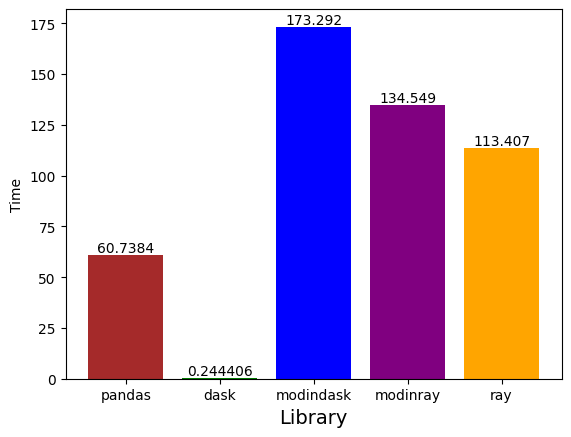

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
results
colors = ['brown','green','blue','purple','orange']
df = pd.DataFrame(results)
ax=plt.bar(df['lib'], df['time'], color=colors)
plt.bar_label(ax)
plt.xlabel('Library', fontsize=14)
plt.ylabel('Time', fontsize=10)
plt.show()

From the chart, we could see that dask took the shortest time to load the csv file while modin-dask took the longest time. Therefore, we will employ dask library for this ingestion task.

In [ ]:
dask_df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

### The column names are all okay so there is no need to alter it.

### Creating testutility file

In [ ]:
!pip install virtualenv

In [ ]:
!pip install pyyaml

In [ ]:
%cd /content/gdrive/MyDrive/ColabNotebooks

/content/gdrive/MyDrive/ColabNotebooks


In [ ]:
%%writefile testutility.py
import logging
import os
import subprocess
import yaml
import pandas as pd
from dask import dataframe as dd
import datetime
import gc
import re


################
# File Reading #
################

def read_config_file(filepath):
    with open(filepath, 'r') as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            logging.error(exc)


def replacer(string, char):
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string)
    return string

def col_header_val(df,table_config):
    '''
    replace whitespaces in the column
    and standardized column names
    '''
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace('[^\w]','_',regex=True)
    df.columns = list(map(lambda x: x.strip('_'), list(df.columns)))
    df.columns = list(map(lambda x: replacer(x,'_'), list(df.columns)))
    expected_col = list(map(lambda x: x.lower(),  table_config['columns']))
    expected_col.sort()
    df.columns =list(map(lambda x: x.lower(), list(df.columns)))
    df = df.reindex(sorted(df.columns), axis=1)
    if len(df.columns) == len(expected_col) and list(expected_col)  == list(df.columns):
        print("column name and column length validation passed")
        return 1
    else:
        print("column name and column length validation failed")
        mismatched_columns_file = list(set(df.columns).difference(expected_col))
        print("Following File columns are not in the YAML file",mismatched_columns_file)
        missing_YAML_file = list(set(expected_col).difference(df.columns))
        print("Following YAML columns are not in the file uploaded",missing_YAML_file)
        logging.info(f'df columns: {df.columns}')
        logging.info(f'expected columns: {expected_col}')
        return 0

Overwriting testutility.py


### Writing YAML file

In [ ]:
%%writefile file.yaml
file_type: csv
dataset_name: eventfile
file_name: output_2
table_name: events_table
inbound_delimiter: ","
outbound_delimiter: "|"
skip_leading_rows: 1
columns:
    - event_time
    - event_type
    - product_id
    - category_id
    - category_code
    - brand
    - price
    - user_id
    - user_session

Overwriting file.yaml


### Readinig config file

In [ ]:
!pip install python-utils

In [ ]:
# Read config file
import testutility as util
config_data = util.read_config_file("file.yaml")
config_data

{'file_type': 'csv',
 'dataset_name': 'eventfile',
 'file_name': 'output_2',
 'table_name': 'events_table',
 'inbound_delimiter': ',',
 'outbound_delimiter': '|',
 'skip_leading_rows': 1,
 'columns': ['event_time',
  'event_type',
  'product_id',
  'category_id',
  'category_code',
  'brand',
  'price',
  'user_id',
  'user_session']}

In [ ]:
config_data['file_type']

'csv'

In [ ]:
config_data['inbound_delimiter']

','

In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
# Normal reading process of the file
from dask import dataframe as dd
import pandas as pd
dask_df = pd.read_csv('Data_Glacier_Internship/data/output_2.csv', delimiter=',')
dask_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 19:10:38 UTC,view,41900000,2090971686529663114,appliances.environment.vacuum,NaN,36.22,519623371,30b199bc-649a-436d-871d-7dbbd3531eda
1,2019-10-21 19:10:38 UTC,view,28715969,2053013565069067197,apparel.shoes.keds,adidas,97.81,512622744,4a565395-7122-4101-ab48-f1ceb74baee3
2,2019-10-21 19:10:38 UTC,view,26200067,2053013563693335403,NaN,NaN,180.70,562735644,876ef257-d2fd-4a44-bf97-e31d4ebf27dd
3,2019-10-21 19:10:38 UTC,view,1201297,2172371436436455782,electronics.tablet,apple,411.57,542347312,772eb069-a025-42b1-8e07-ad675976beda
4,2019-10-21 19:10:38 UTC,view,44500045,2144356630513320518,NaN,omabelle,2471.11,514114558,af003736-e82c-4810-bb78-cecd8e761126


In [ ]:
# read the file using config file
file_type = config_data['file_type']
source_file = 'Data_Glacier_Internship/data/' + config_data['file_name'] + f'.{file_type}'
print("Source file path:",source_file)
data = pd.read_csv(source_file, delimiter=config_data['inbound_delimiter'])
data.head()

Source file path: Data_Glacier_Internship/data/output_2.csv


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 19:10:38 UTC,view,41900000,2090971686529663114,appliances.environment.vacuum,NaN,36.22,519623371,30b199bc-649a-436d-871d-7dbbd3531eda
1,2019-10-21 19:10:38 UTC,view,28715969,2053013565069067197,apparel.shoes.keds,adidas,97.81,512622744,4a565395-7122-4101-ab48-f1ceb74baee3
2,2019-10-21 19:10:38 UTC,view,26200067,2053013563693335403,NaN,NaN,180.70,562735644,876ef257-d2fd-4a44-bf97-e31d4ebf27dd
3,2019-10-21 19:10:38 UTC,view,1201297,2172371436436455782,electronics.tablet,apple,411.57,542347312,772eb069-a025-42b1-8e07-ad675976beda
4,2019-10-21 19:10:38 UTC,view,44500045,2144356630513320518,NaN,omabelle,2471.11,514114558,af003736-e82c-4810-bb78-cecd8e761126


In [ ]:
#validate the header of the file
util.col_header_val(data,config_data)

column name and column length validation passed


1

In [ ]:
print("columns of files are:" ,data.columns)
print("columns of YAML are:" ,config_data['columns'])

columns of files are: Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')
columns of YAML are: ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']


In [ ]:
if util.col_header_val(data,config_data)==0:
    print("validation failed")
    # write code to reject the file
else:
    print("col validation passed")
    # write the code to perform further action
    # in the pipleine

column name and column length validation passed
col validation passed


In [7]:
import csv
import gzip

from dask import dataframe as dd
df = dd.read_csv('Data_Glacier_Internship/data/output_2.csv', delimiter="\t")



In [ ]:
# Write csv in gz format in pipe separated text file (|)
df.to_csv('Data_Glacier_Internship/data/output_2.gz',
          sep='|',
          header=True,
          index=False,
          quoting=csv.QUOTE_ALL,
          compression='gzip',
          quotechar='"',
          doublequote=True,
         )

['/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/00.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/01.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/02.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/03.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/04.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/05.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/06.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/07.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/08.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/09.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/10.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/11.part',
 '/content/gdrive/MyDrive/Data_Glacier_Internship/data/output_2.gz/12.part',

In [8]:
# Get file summary
file_size = os.path.getsize('Data_Glacier_Internship/data/output_2.gz')
num_rows = len(df)
num_cols = len(df.columns)

# Print file summary
print("File summary:")
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(f"File size: {file_size} bytes")

File summary:
Number of rows: 13321655
Number of columns: 1
File size: 4096 bytes
